## CNN using MNIST dataset

In [ ]:
"""
A. Do some necessary importslike:
a. Download the MNIST dataset through Keras
b. Import a sequential model
c. Import the convolution and pooling layers
d. Import dense layers, dropout layer, and the flatten layer
e. Import numpy
B. Fit the dataset to a model, i.e. train the model for 12 epochs.
a. After training the model,evaluate the loss and accuracy of the model on the test
data and print it. 
"""

In [15]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
import numpy as np

## Splitting data into train and test sets 

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Plotting first image in the train data

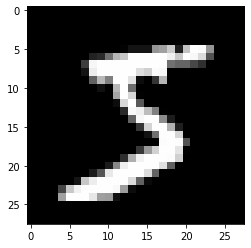

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="Greys_r")

## Checking image shape

In [10]:
X_train[0].shape

(28, 28)

## Data pre-processing

### Reshape data to fit the model 

In [11]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

### One-hot encode target column 

In [13]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building the model

### Creating the model and adding layers 

In [31]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

### Compiling the model using accuracy to measure model performance

In [32]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### Training the model

In [33]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=12)

Epoch 1/12
1875/1875 [==============================] - 94s 50ms/step - loss: 0.2651 - accuracy: 0.9561 - val_loss: 0.0569 - val_accuracy: 0.9812
Epoch 2/12
1875/1875 [==============================] - 95s 50ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0541 - val_accuracy: 0.9836
Epoch 3/12
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0415 - accuracy: 0.9871 - val_loss: 0.0820 - val_accuracy: 0.9768
Epoch 4/12
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.0809 - val_accuracy: 0.9822
Epoch 5/12
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0275 - accuracy: 0.9919 - val_loss: 0.0649 - val_accuracy: 0.9837
Epoch 6/12
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0215 - accuracy: 0.9934 - val_loss: 0.0723 - val_accuracy: 0.9838
Epoch 7/12
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0192 - accuracy: 0.9946 - val_loss: 0.0653 -

## Predicting 

### Predicting for first image in the test data 

In [34]:
out1 = model.predict(X_test[0:1])
np.argmax(out1)

7

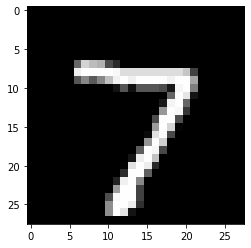

In [35]:
plt.imshow(X_test[0], cmap="Greys_r")

### Predicting for first four images in the test data

In [36]:
model.predict(X_test[:4])

array([[6.4690518e-33, 1.3551577e-28, 8.0753404e-20, 2.5174828e-23,
        1.8612979e-28, 7.4354937e-35, 2.6083312e-28, 1.0000000e+00,
        2.9153148e-28, 3.0446644e-25],
       [6.7734130e-24, 1.6300241e-21, 1.0000000e+00, 1.1367553e-22,
        3.0107896e-32, 0.0000000e+00, 1.6233257e-17, 2.2033626e-32,
        6.7997537e-28, 1.2759637e-38],
       [6.7573615e-16, 1.0000000e+00, 3.7722383e-20, 1.4418495e-19,
        1.6666637e-12, 3.2378300e-16, 6.6602335e-11, 2.0530002e-13,
        2.7546498e-15, 4.3577508e-19],
       [1.0000000e+00, 1.9981385e-28, 2.3108147e-16, 3.9068601e-26,
        2.3424987e-32, 1.1976737e-24, 2.1445114e-17, 1.0019242e-23,
        7.7157469e-21, 3.1848819e-18]], dtype=float32)

### Actual results for first 4 images in test data 

In [37]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)